### Pie Charts

Pie charts present data in a circular graph that is divided into slices according to the categories being analised. 

To create our pie chart, first we need to have our dataset organised, this has been covered in more detail in sections "Course Visualising Data with Python MOD1 and MOD2". Let's do a quick version of it here:

In [3]:
import numpy as np
import pandas as pd
df_can=pd.read_excel('~/Documents/Cambridge/Python-Lessons/Canada.xlsx',
                    sheet_name='Canada by Citizenship',
                    skiprows=range(20),
                    skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
#cleaning dataset, by deleting some columns and updating the dataset
df_can.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)

#renaming some columns and update dataset
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)

#changing column names to string type
df_can.columns=list(map(str,df_can.columns))

#set index as column and update dataset
df_can.set_index('Country',inplace=True)

#create a column with total
df_can['Total']=df_can.sum(axis=1)

#create list with year numbers
years=list(map(str,range(1980,2014)))

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Now that the dataset is clean and organised, we can start using it for plotting:

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [8]:
#use method 'groupby()' to select data based on a criteria, then subject it to a transformation (a transformation is necesary)

#select the rows called 'Continents', and sum them up according to the different categories inside 'Continents'
df_continents=df_can.groupby('Continent',axis=0).sum()

df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


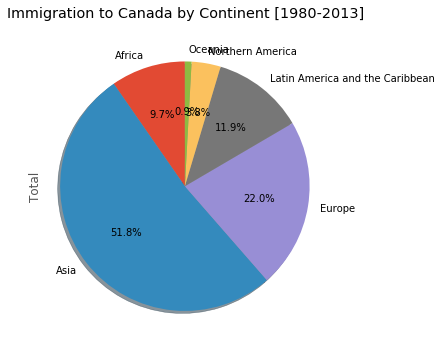

In [10]:
df_continents['Total'].plot(kind='pie',
                           figsize=(5,6),
                           autopct='%1.1f%%', #places label inside wedges and in percentages format
                           startangle=90, #starts the pie chart at 90 degrees
                           shadow=True, #gives it a 3D effect
                           )
plt.title('Immigration to Canada by Continent [1980-2013]')
plt.axis('equal') #sets axis to be a circle

plt.show()

As you can see, some of the writing are very difficult to read, let's try to fix this:

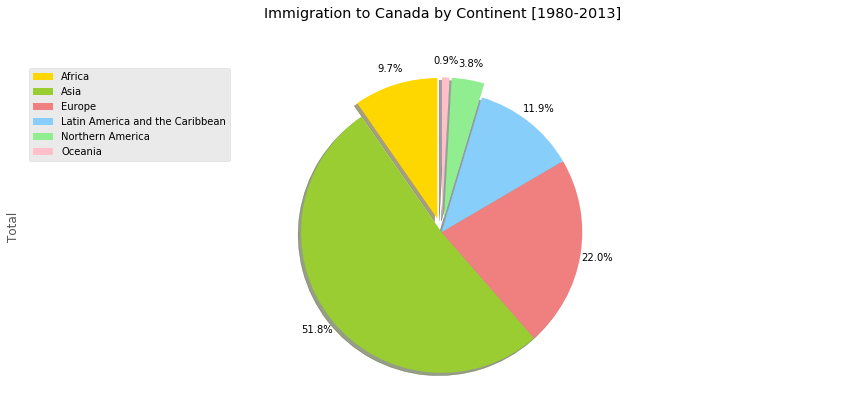

In [12]:
colors_list=['gold','yellowgreen','lightcoral','lightskyblue','lightgreen','pink']

#small wedges in the pie chart are difficult to see, so we will make them come out slightly from the chart
explode_list=[0.1,0,0,0,0.1,0.1] #starts counting at the first item of the 'Continent' column, so Africa

df_continents['Total'].plot(kind='pie',
                           figsize=(15,6),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None, #remove labels on the pie chart. We will add them as legends
                           pctdistance=1.12, #distance from the pie chart to the text generated by autopct
                           colors=colors_list,
                           explode=explode_list
                           )

plt.title('Immigration to Canada by Continent [1980-2013]',y=1.12) #scale the title up by 12% to match pctdistance

plt.axis('equal')

plt.legend(labels=df_continents.index,loc='upper left') #create legend based on index, and specify where it appears on the plot

plt.show()